<h1 style="color:red;"><strong>1. Look at the big Picture</h1>

<h2 style="color:Orange;">1.1 Frame the Problems</h2>

* **What's the business objective**

* **How does the company expect to use and benefit from the model?**

* Frame problems --> chose algorithm --> performance measure --> ways/time to tune the model

<h2 style="color:Orange;">1.2 Chose performance measure (Loss)</h2>


RMSE


<h2 style="color:Orange;">1.3 Chose performance measure (Metrics)</h2>

RMSE

<h2 style="color:Orange;">1.4 Check the Assumptions</h2>


Self-Selection bias

<h1 style="color:red;"><strong>2. Get the Data</h1>

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
#-----------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
df = pd.read_csv("NFWBS_PUF_2016_data.csv")

In [4]:
# Take a look at the top 5 rows
df.head()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4,FSscore,FS1_1,FS1_2,FS1_3,FS1_4,FS1_5,FS1_6,FS1_7,FS2_1,FS2_2,FS2_3,SUBKNOWL1,ACT1_1,ACT1_2,FINGOALS,PROPPLAN_1,PROPPLAN_2,PROPPLAN_3,PROPPLAN_4,MANAGE1_1,MANAGE1_2,MANAGE1_3,MANAGE1_4,SAVEHABIT,FRUGALITY,AUTOMATED_1,AUTOMATED_2,ASK1_1,ASK1_2,SUBNUMERACY2,SUBNUMERACY1,CHANGEABLE,GOALCONF,LMscore,FINKNOWL1,FINKNOWL2,FINKNOWL3,FK1correct,FK2correct,FK3correct,KHscore,KHKNOWL1,KHKNOWL2,KHKNOWL3,KHKNOWL4,KHKNOWL5,KHKNOWL6,KHKNOWL7,KHKNOWL8,KHKNOWL9,KH1correct,KH2correct,KH3correct,KH4correct,KH5correct,KH6correct,KH7correct,KH8correct,KH9correct,ENDSMEET,HOUSING,LIVINGARRANGEMENT,HOUSERANGES,IMPUTATION_FLAG,VALUERANGES,MORTGAGE,SAVINGSRANGES,PRODHAVE_1,PRODHAVE_2,PRODHAVE_3,PRODHAVE_4,PRODHAVE_5,PRODHAVE_6,PRODHAVE_7,PRODHAVE_8,PRODHAVE_9,PRODUSE_1,PRODUSE_2,PRODUSE_3,PRODUSE_4,PRODUSE_5,PRODUSE_6,CONSPROTECT1,CONSPROTECT2,CONSPROTECT3,EARNERS,VOLATILITY,SNAP,MATHARDSHIP_1,MATHARDSHIP_2,MATHARDSHIP_3,MATHARDSHIP_4,MATHARDSHIP_5,MATHARDSHIP_6,COLLECT,REJECTED_1,REJECTED_2,ABSORBSHOCK,BENEFITS_1,BENEFITS_2,BENEFITS_3,BENEFITS_4,BENEFITS_5,FRAUD2,COVERCOSTS,BORROW_1,BORROW_2,SHOCKS_1,SHOCKS_2,SHOCKS_3,SHOCKS_4,SHOCKS_5,SHOCKS_6,SHOCKS_7,SHOCKS_8,SHOCKS_9,SHOCKS_10,SHOCKS_11,SHOCKS_12,MANAGE2,PAIDHELP,HSLOC,PAREDUC,FINSOC2_1,FINSOC2_2,FINSOC2_3,FINSOC2_4,FINSOC2_5,FINSOC2_6,FINSOC2_7,OBJNUMERACY1,ON2correct,ON1correct,MATERIALISM_1,MATERIALISM_2,MATERIALISM_3,CONNECT,HEALTH,SCFHORIZON,DISCOUNT,MEMLOSS,DISTRESS,SELFCONTROL_1,SELFCONTROL_2,SELFCONTROL_3,OUTLOOK_1,OUTLOOK_2,INTERCONNECTIONS_1,INTERCONNECTIONS_2,INTERCONNECTIONS_3,INTERCONNECTIONS_4,INTERCONNECTIONS_5,INTERCONNECTIONS_6,INTERCONNECTIONS_7,INTERCONNECTIONS_8,INTERCONNECTIONS_9,INTERCONNECTIONS_10,PEM,HOUSESAT,SOCSEC1,SOCSEC2,SOCSEC3,LIFEEXPECT,HHEDUC,KIDS_NoChildren,KIDS_1,KIDS_2,KIDS_3,KIDS_4,EMPLOY,EMPLOY1_1,EMPLOY1_2,EMPLOY1_3,EMPLOY1_4,EMPLOY1_5,EMPLOY1_6,EMPLOY1_7,EMPLOY1_8,EMPLOY1_9,RETIRE,MILITARY,Military_Status,agecat,generation,PPEDUC,PPETHM,PPGENDER,PPHHSIZE,PPINCIMP,PPMARIT,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,3,2,3,2,3,2,4,44,3,3,4,3,3,3,4,4,3,4,5,4,3,1,5,4,4,3,4,4,2,4,4,6,0,0,4,3,3,3,4,3,3,1,3,2,1,1,1,1.267,3,3,2,1,1,2,4,2,1,1,1,1,1,1,1,1,1,1,2,1,1,4,0,2,2,6,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,3,2,1,1,2,0,1,1,1,1,1,1,1,0,0,4,0,0,1,0,0,8,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,3,-2,-1,4,0,1,1,1,1,1,1,3,1,0,3,5,4,80,2,3,2,0,4,2,3,3,3,2,0,0,0,0,1,0,1,1,0,0,3,4,1,62,-2,-2,4,-1,0,0,0,0,8,0,0,0,0,0,0,0,1,0,1,0,5,8,1,4,1,1,1,7,3,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,3,3,4,2,2,2,3,43,3,3,3,3,4,3,2,4,3,2,5,4,3,0,3,2,2,1,4,4,1,4,1,5,0,0,3,2,5,5,2,3,3,1,3,2,1,1,1,-0.570,2,3,3,1,1,2,2,3,1,0,1,0,1,1,1,0,0,1,2,1,2,4,0,2,2,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,1,0,2,2,0,1,1,1,1,1,1,1,0,0,3,1,0,0,0,1,0,3,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,2,0,0,0,0,1,0,0,2,1,1,3,4,3,95,3,3,1,0,3,2,4,3,2,5,0,1,0,0,0,0,0,0,0,0,4,3,-2,-2,66,90,2,1,0,0,0,0,2,0,1,0,0,0,0,0,0,0,-2,0,5,3,3,2,1,1,2,6,3,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,3,3,3,3,3,3,3,42,3,3,3,3,3,3,3,3,3,3,5,3,3,1,4,4,4,4,3,3,3,3,5,5,1,1,4,4,4,4,6,3,3,1,3,2,1,1,1,-0.188,3,3,1,1,2,2,2,2,1,1,1,0,1,0,1,0,1,1,1,1,2,3,0,3,2,4,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,3,3,1,2,3,0,1,1,1,1,1,1,0,0,0,4,1,0,0,0,0,0,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,1,3,-2,1,3,0,0,0,1,0,0,1,2,0,1,4,4,3,50,3,4,2,0,2,3,3,3,4,4,0,1,0,0,0,0,0,0,0,0,6,3,-2,-2,68,78,3,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,-2,0,5,3,3,3,2,1,3,6,3,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,3,3,3,3,3,3,3,42,3,3,3,3,3,3,3,3,3,3,-1,-1,-1,-1,3,3,3,3,4,4,2,4,4,6,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,2,1,0,1,-1.485,2,2,3,1,2,2,2,-1,1,0,0,0,1,0,1,0,0,1,-1,-1,-1,99,0,-2,-2,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,-1,-1,-1,-1,-1,-1,2,2,2,2,2,2,-1,0,1,8,0,0,0,0,0,8,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,1,-1,-2,1,2,0,1,1,1,1,1,1,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,1,-1,-1,-2,-2,-1,-1,-1,-1,0,0,0,0,99,0,0,0,0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6394 entries, 0 to 6393
Columns: 217 entries, PUF_ID to finalwt
dtypes: float64(2), int64(215)
memory usage: 10.6 MB


In [6]:
df.describe()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4,FSscore,FS1_1,FS1_2,FS1_3,FS1_4,FS1_5,FS1_6,FS1_7,FS2_1,FS2_2,FS2_3,SUBKNOWL1,ACT1_1,ACT1_2,FINGOALS,PROPPLAN_1,PROPPLAN_2,PROPPLAN_3,PROPPLAN_4,MANAGE1_1,MANAGE1_2,MANAGE1_3,MANAGE1_4,SAVEHABIT,FRUGALITY,AUTOMATED_1,AUTOMATED_2,ASK1_1,ASK1_2,SUBNUMERACY2,SUBNUMERACY1,CHANGEABLE,GOALCONF,LMscore,FINKNOWL1,FINKNOWL2,FINKNOWL3,FK1correct,FK2correct,FK3correct,KHscore,KHKNOWL1,KHKNOWL2,KHKNOWL3,KHKNOWL4,KHKNOWL5,KHKNOWL6,KHKNOWL7,KHKNOWL8,KHKNOWL9,KH1correct,KH2correct,KH3correct,KH4correct,KH5correct,KH6correct,KH7correct,KH8correct,KH9correct,ENDSMEET,HOUSING,LIVINGARRANGEMENT,HOUSERANGES,IMPUTATION_FLAG,VALUERANGES,MORTGAGE,SAVINGSRANGES,PRODHAVE_1,PRODHAVE_2,PRODHAVE_3,PRODHAVE_4,PRODHAVE_5,PRODHAVE_6,PRODHAVE_7,PRODHAVE_8,PRODHAVE_9,PRODUSE_1,PRODUSE_2,PRODUSE_3,PRODUSE_4,PRODUSE_5,PRODUSE_6,CONSPROTECT1,CONSPROTECT2,CONSPROTECT3,EARNERS,VOLATILITY,SNAP,MATHARDSHIP_1,MATHARDSHIP_2,MATHARDSHIP_3,MATHARDSHIP_4,MATHARDSHIP_5,MATHARDSHIP_6,COLLECT,REJECTED_1,REJECTED_2,ABSORBSHOCK,BENEFITS_1,BENEFITS_2,BENEFITS_3,BENEFITS_4,BENEFITS_5,FRAUD2,COVERCOSTS,BORROW_1,BORROW_2,SHOCKS_1,SHOCKS_2,SHOCKS_3,SHOCKS_4,SHOCKS_5,SHOCKS_6,SHOCKS_7,SHOCKS_8,SHOCKS_9,SHOCKS_10,SHOCKS_11,SHOCKS_12,MANAGE2,PAIDHELP,HSLOC,PAREDUC,FINSOC2_1,FINSOC2_2,FINSOC2_3,FINSOC2_4,FINSOC2_5,FINSOC2_6,FINSOC2_7,OBJNUMERACY1,ON2correct,ON1correct,MATERIALISM_1,MATERIALISM_2,MATERIALISM_3,CONNECT,HEALTH,SCFHORIZON,DISCOUNT,MEMLOSS,DISTRESS,SELFCONTROL_1,SELFCONTROL_2,SELFCONTROL_3,OUTLOOK_1,OUTLOOK_2,INTERCONNECTIONS_1,INTERCONNECTIONS_2,INTERCONNECTIONS_3,INTERCONNECTIONS_4,INTERCONNECTIONS_5,INTERCONNECTIONS_6,INTERCONNECTIONS_7,INTERCONNECTIONS_8,INTERCONNECTIONS_9,INTERCONNECTIONS_10,PEM,HOUSESAT,SOCSEC1,SOCSEC2,SOCSEC3,LIFEEXPECT,HHEDUC,KIDS_NoChildren,KIDS_1,KIDS_2,KIDS_3,KIDS_4,EMPLOY,EMPLOY1_1,EMPLOY1_2,EMPLOY1_3,EMPLOY1_4,EMPLOY1_5,EMPLOY1_6,EMPLOY1_7,EMPLOY1_8,EMPLOY1_9,RETIRE,MILITARY,Military_Status,agecat,generation,PPEDUC,PPETHM,PPGENDER,PPHHSIZE,PPINCIMP,PPMARIT,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.00000,6394.000000,6394.000000,6394.000000,6394.000000,6394.00000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.00000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.00000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.00000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.00

In [7]:
def filter_columns(df, include_strings):
    """
    Filter DataFrame columns containing any of the strings in include_strings.
    
    Args:
    df (pandas.DataFrame): Input DataFrame.
    include_strings (list): List of strings that need to be included in the column names.
    
    Returns:
    pandas.DataFrame: Filtered DataFrame.
    """
    filtered_columns = []
    for col in df.columns:
        if any(include_string in col.lower() for include_string in include_strings):
            filtered_columns.append(col)
    return df[filtered_columns]

In [8]:
df = filter_columns(df, include_strings=['fwb'])

<h1 style="color:red;"><strong>3. Data Cleaning (General)</h1>

<h2 style="color:Orange;">3.1 Formating</h2>

In [9]:
df.head(1)

,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4
0,55,3,3,3,3,2,3,2,3,2,4


In [10]:
df.columns

Index(['FWBscore', 'FWB1_1', 'FWB1_2', 'FWB1_3', 'FWB1_4', 'FWB1_5', 'FWB1_6',
       'FWB2_1', 'FWB2_2', 'FWB2_3', 'FWB2_4'],
      dtype='object')

### 3.1.1 Format column names

In [11]:
def rename_columns(df):
   # convert form camel case to snake case
   df.columns = (df.columns
                  .str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True)
                  .str.lower()
               )
   # convert " " to _
   df.columns = df.columns.str.replace(' ', '_')
   return df

In [12]:
df = rename_columns(df)

In [13]:
df.columns

Index(['fwbscore', 'fwb1_1', 'fwb1_2', 'fwb1_3', 'fwb1_4', 'fwb1_5', 'fwb1_6',
       'fwb2_1', 'fwb2_2', 'fwb2_3', 'fwb2_4'],
      dtype='object')

### 3.1.2 Format data body

Skip

### 3.1.3 Format Datatypes
After we format all the data body and columns, let's format the data types

In [14]:
object_columns = df.select_dtypes(include=['object'])

# Now you can access these columns or perform further operations
print(object_columns) 

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[6394 rows x 0 columns]


Datatypes are formatted correctly, so no need to further format datatypes, but in other scenario, it might be best format datatypes when there's date/datetime columns

<h1 style="color:red;"><strong>4. Attribute Combination</h1>

In [15]:
df.columns

Index(['fwbscore', 'fwb1_1', 'fwb1_2', 'fwb1_3', 'fwb1_4', 'fwb1_5', 'fwb1_6',
       'fwb2_1', 'fwb2_2', 'fwb2_3', 'fwb2_4'],
      dtype='object')

In [16]:
df.head()

,fwbscore,fwb1_1,fwb1_2,fwb1_3,fwb1_4,fwb1_5,fwb1_6,fwb2_1,fwb2_2,fwb2_3,fwb2_4
0,55,3,3,3,3,2,3,2,3,2,4
1,51,2,2,3,3,3,4,2,2,2,3
2,49,3,3,3,3,3,3,3,3,3,3
3,49,3,3,3,3,3,3,3,3,3,3
4,49,3,3,3,3,3,3,3,3,3,3


<h1 style="color:red;"><strong> 5. EDA</h1>

In [17]:
cat_attribs = [col for col in df.columns if len(df[col].unique()) >= 5 and len(df[col].unique()) <= 7]
bin_attribs = [col for col in df.columns if len(df[col].unique()) == 2 or len(df[col].unique()) == 1]
num_attribs = [col for col in df.columns if col not in cat_attribs and col not in bin_attribs and col != 'id']

In [18]:
cat_attribs

['fwb1_1',
 'fwb1_2',
 'fwb1_3',
 'fwb1_4',
 'fwb1_5',
 'fwb1_6',
 'fwb2_1',
 'fwb2_2',
 'fwb2_3',
 'fwb2_4']

In [19]:
bin_attribs

[]

In [20]:
num_attribs

['fwbscore']

## 5.1 Univariate

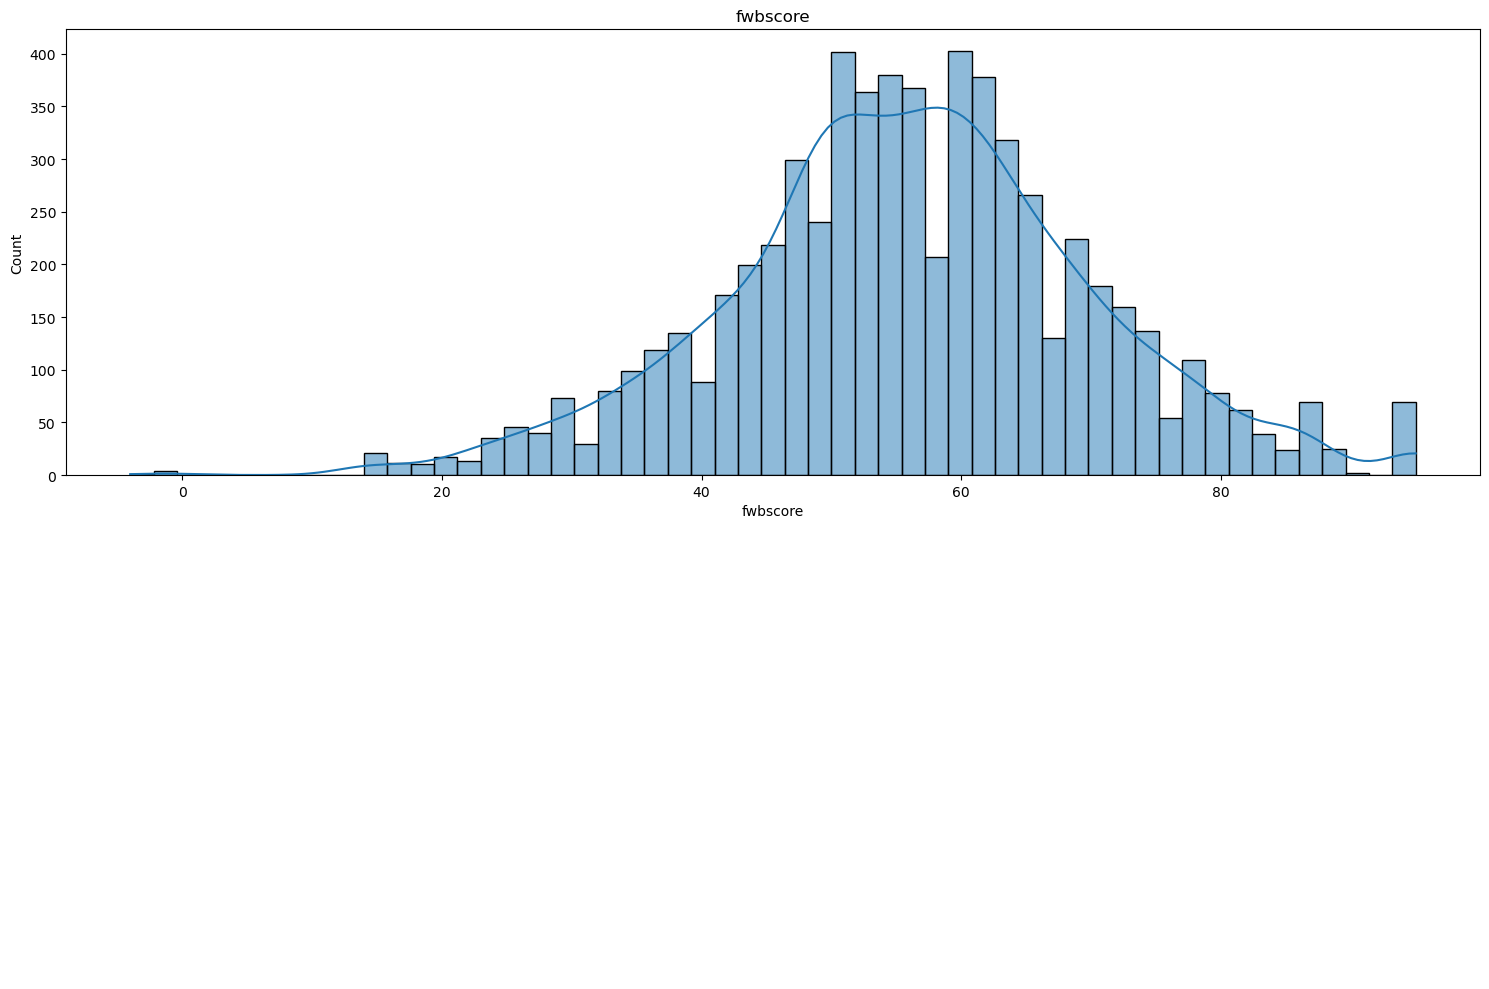

In [21]:
# Define the number of rows and columns for subplots
num_rows = len(num_attribs)+1
num_cols = (len(num_attribs) + num_rows - 1) // num_rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array to iterate over numerical attributes
axes = axes.flatten()

# Iterate over numerical attributes and plot histograms
for i, column in enumerate(num_attribs):
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(column)

# Hide empty subplots
for j in range(i+1, num_rows*num_cols):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [22]:
import math

def univariate_eda_numerical(df, num_attribs):
    # Calculate the number of rows and columns for subplots
    num_plots = len(num_attribs)
    num_cols = math.ceil(math.sqrt(num_plots))
    num_rows = math.ceil(num_plots / num_cols)

    # Create subplots
    fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=num_attribs)

    # Iterate over numerical attributes and plot histograms
    for i, column in enumerate(num_attribs):
        row = i // num_cols + 1
        col = i % num_cols + 1
        trace = go.Histogram(x=df[column], name=column)
        fig.add_trace(trace, row=row, col=col)

    # Update layout
    fig.update_layout(height=600, width=800, title_text="Histograms of Numerical Attributes")
    fig.show()

In [23]:
univariate_eda_numerical(df, num_attribs)

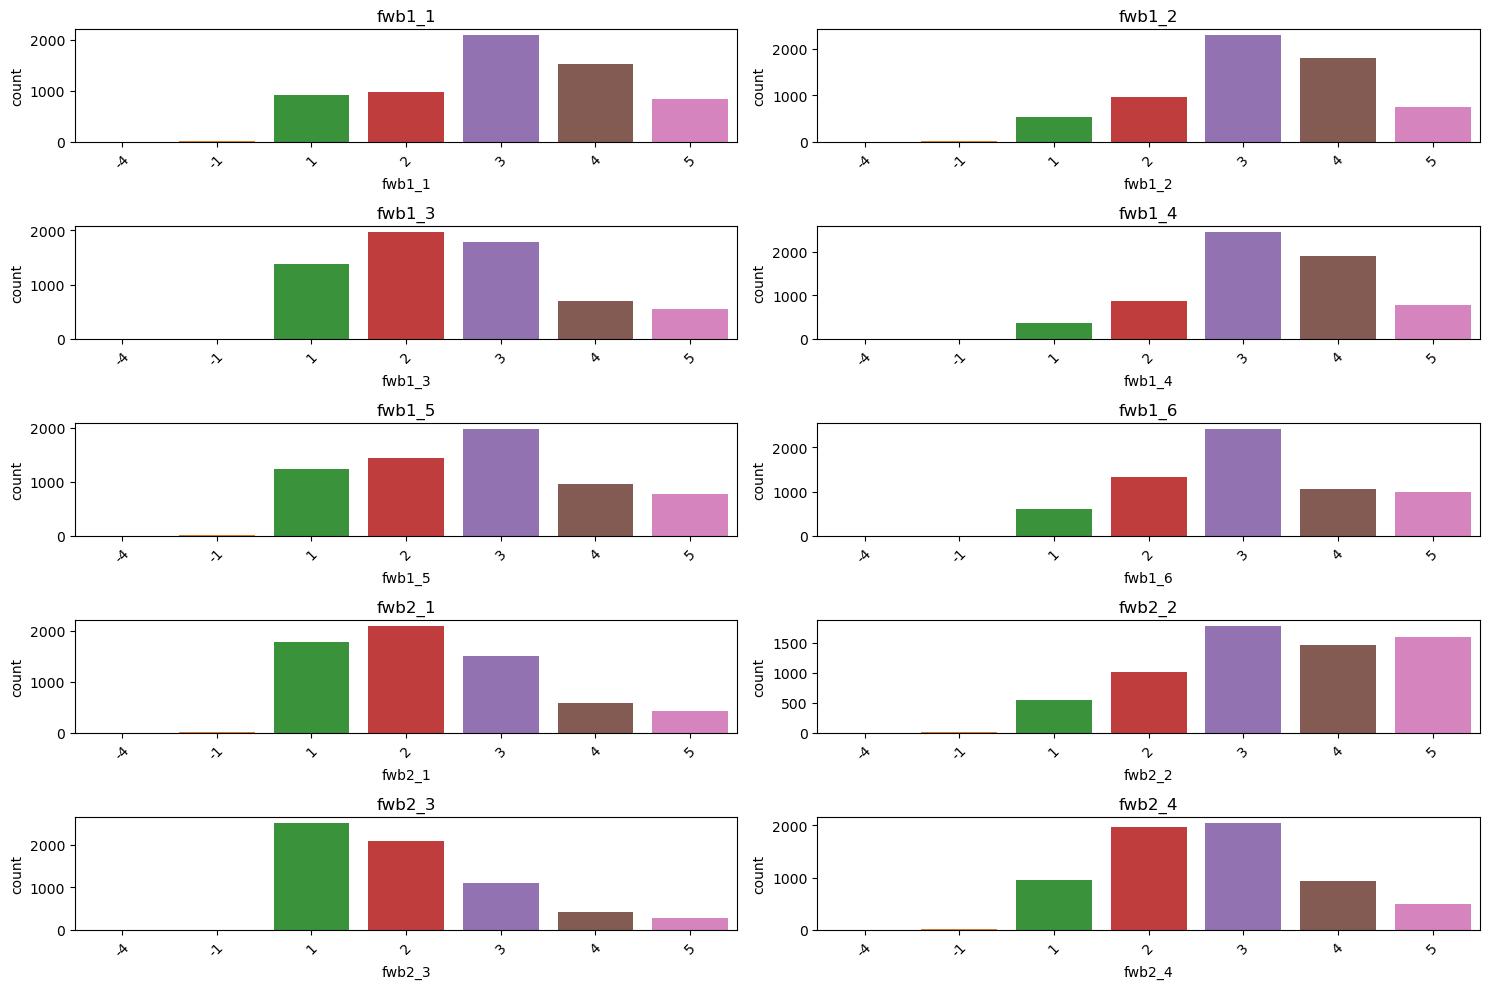

In [24]:
# Define the number of rows and columns for subplots
num_rows = 5
num_cols = (len(cat_attribs) + num_rows - 1) // num_rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array to iterate over binary attributes
axes = axes.flatten()

# Iterate over binary attributes and plot bar graphs
for i, column in enumerate(cat_attribs):
    sns.countplot(x=df[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees

# Hide empty subplots
for j in range(i+1, num_rows*num_cols):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [25]:
def univariate_eda_categorical(df, cat_attribs):
    # Calculate the number of rows and columns for subplots
    num_plots = len(cat_attribs)
    num_cols = math.ceil(math.sqrt(num_plots))
    num_rows = math.ceil(num_plots / num_cols)

    # Create subplots
    fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=cat_attribs)

    # Iterate over categorical attributes and plot bar graphs
    for i, column in enumerate(cat_attribs):
        row = i // num_cols + 1
        col = i % num_cols + 1
        counts = df[column].value_counts()
        trace = go.Bar(x=counts.index, y=counts.values, name=column)
        fig.add_trace(trace, row=row, col=col)
        fig.update_xaxes(title_text=column, row=row, col=col)
        fig.update_traces(showlegend=False)

    # Update layout
    fig.update_layout(height=600, width=800, title_text="Bar Graphs of Categorical Attributes",
                      legend=dict(x=0, y=-0.3))  # Adjust legend position
    fig.show()

In [26]:
univariate_eda_numerical(df, cat_attribs+bin_attribs)

## 5.2 Bivariate

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



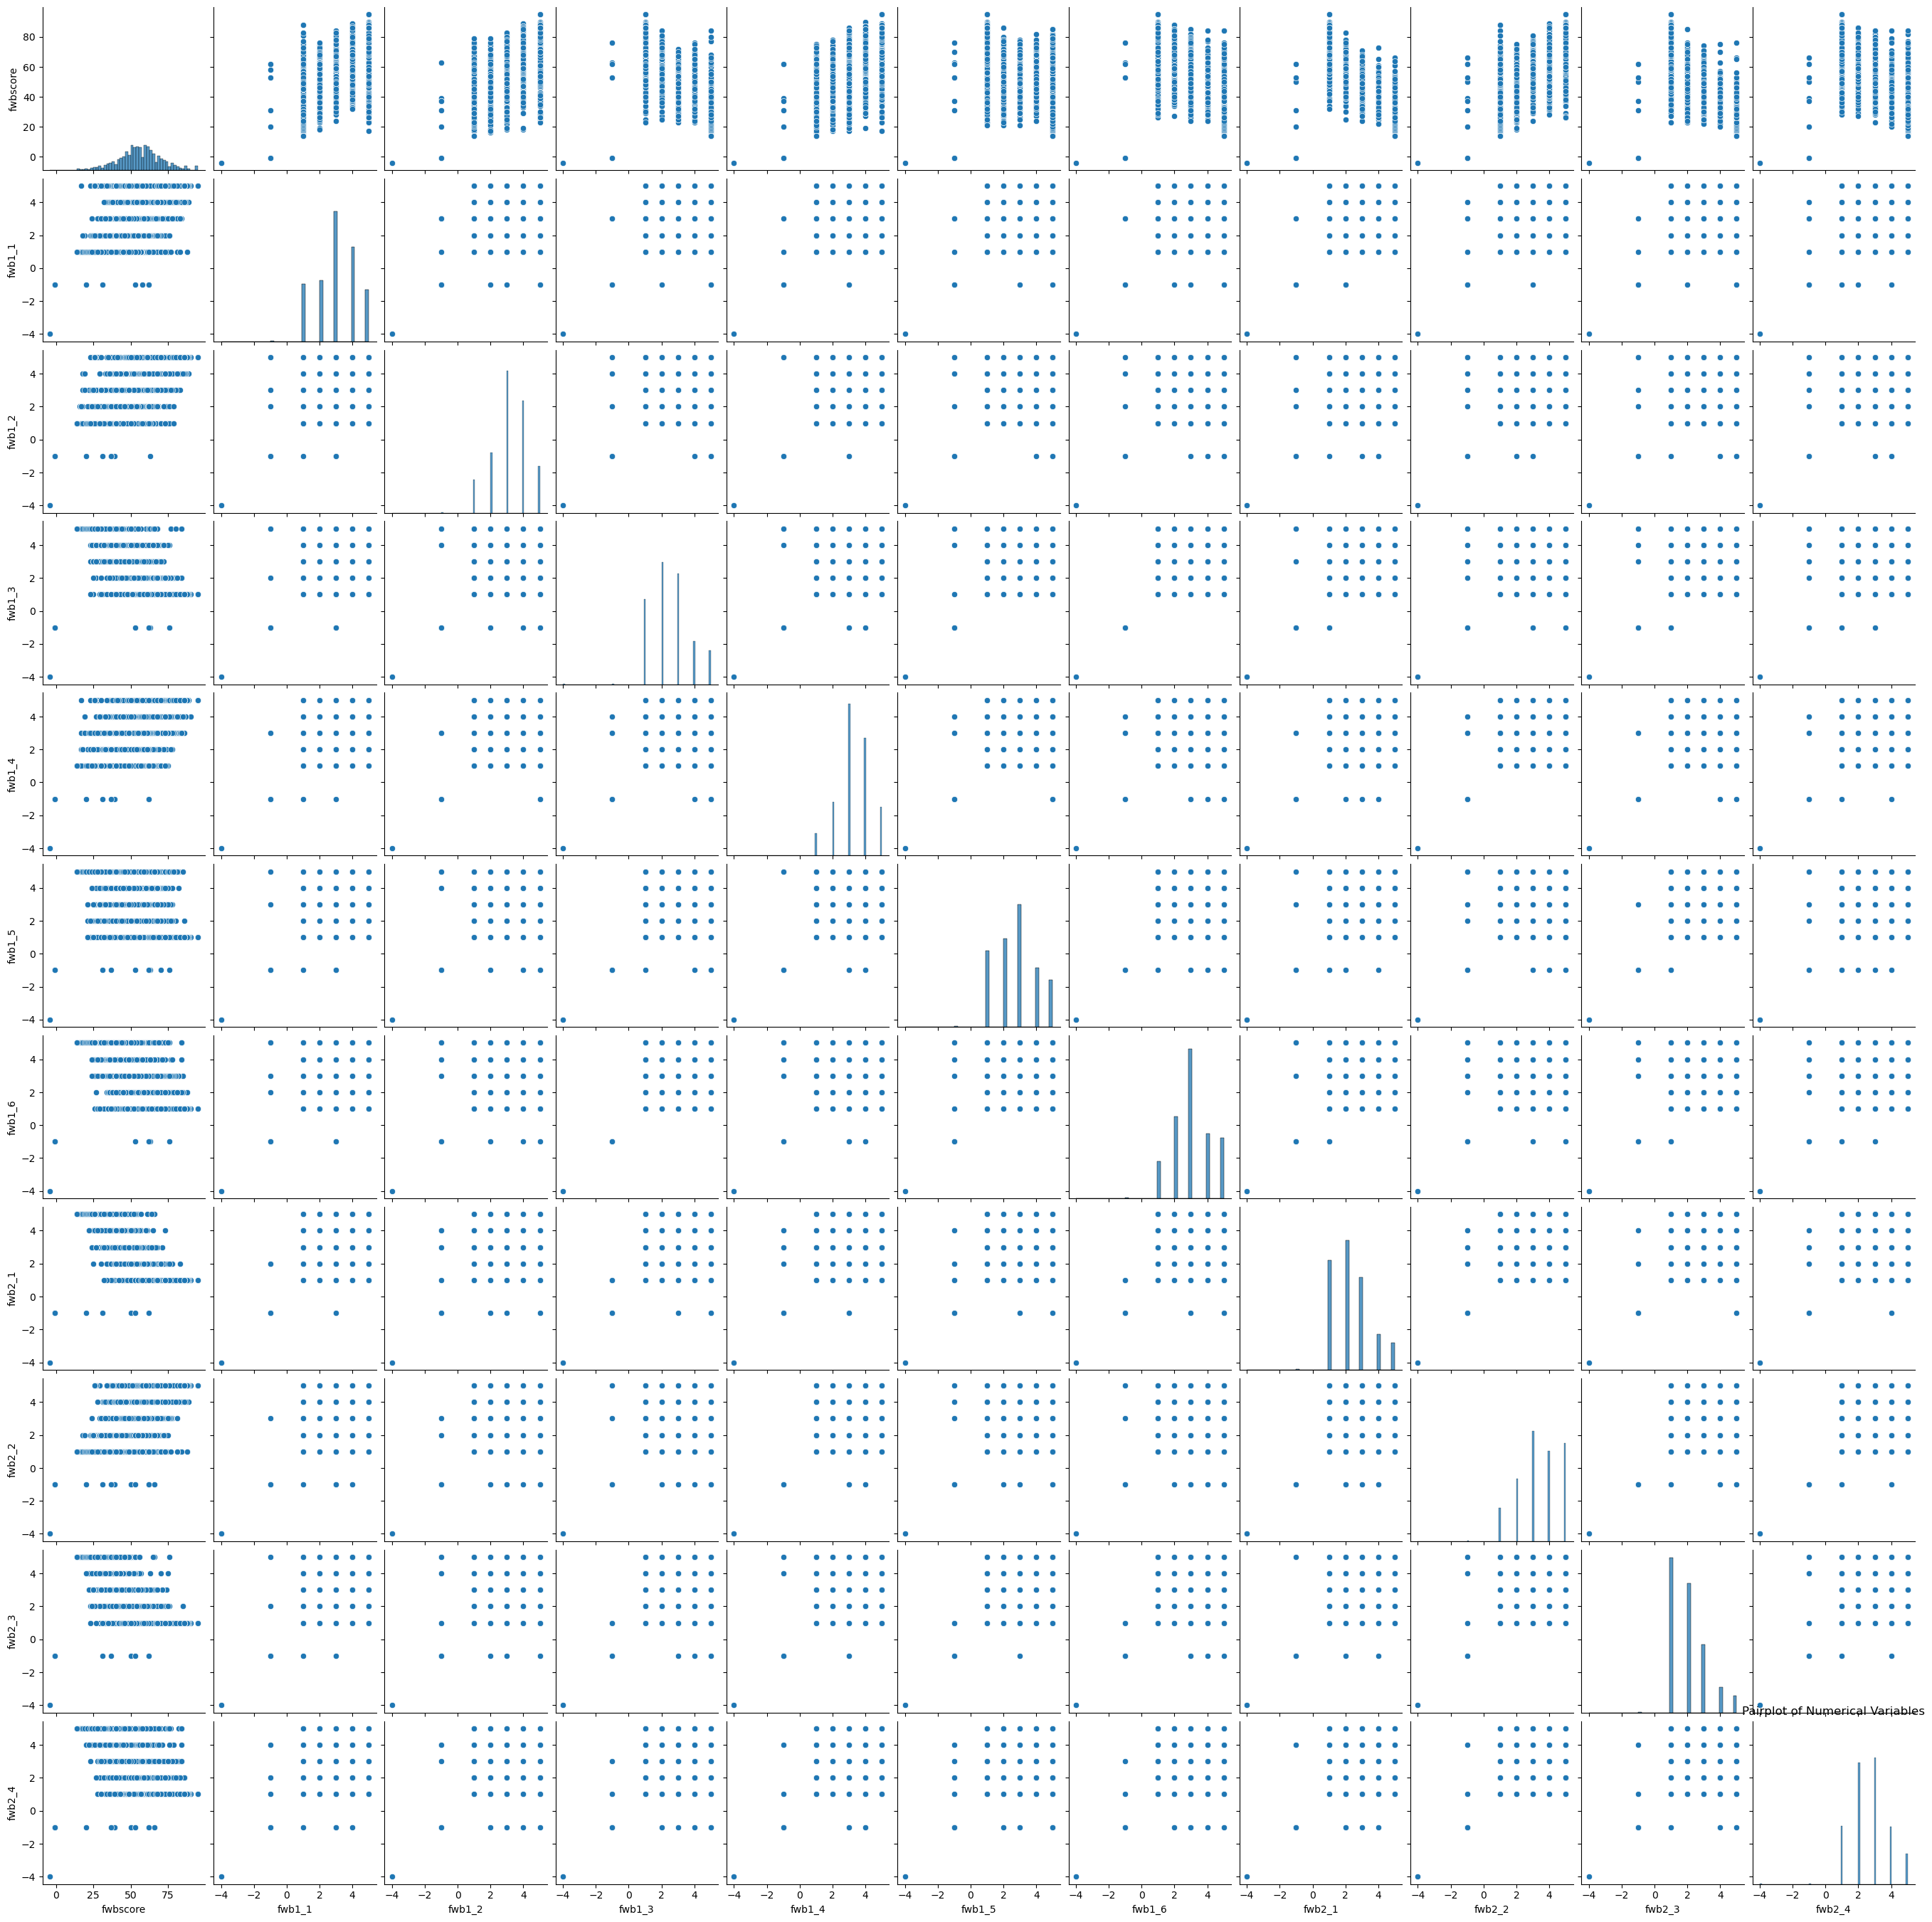

In [27]:
sns.pairplot(df[num_attribs+cat_attribs])
plt.title('Pairplot of Numerical Variables')
plt.show()

In [28]:
def plot_distribution_curves(df, columns, hue_columns):
    """
    Plot distribution curves for each column in the DataFrame
    with respect to the specified hue columns using different colors.

    Parameters:
        df (pandas.DataFrame): DataFrame containing the data.
        columns (list): List of columns to plot.
        hue_columns (list): List of columns to use for coloring the distribution curves.

    Returns:
        None
    """
    num_plots = len(columns) * len(hue_columns)
    fig, axes = plt.subplots(nrows=len(hue_columns), ncols=len(columns), figsize=(15, 40))
    axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

    for i, hue_col in enumerate(hue_columns):
        unique_values = df[hue_col].unique()
        colors = sns.color_palette("husl", len(unique_values))

        for j, col in enumerate(columns):
            for k, value in enumerate(unique_values):
                sns.kdeplot(data=df[df[hue_col] == value], x=col, color=colors[k], ax=axes[i*len(columns) + j])
            axes[i*len(columns) + j].set_title(f"Distribution of {col} by {hue_col}")
            axes[i*len(columns) + j].set_xlabel(col)
            axes[i*len(columns) + j].set_ylabel('Density')
            axes[i*len(columns) + j].legend(unique_values, title=hue_col)

    plt.tight_layout()
    plt.show()

In [29]:
num_attribs

['fwbscore']

In [30]:
cat_attribs

['fwb1_1',
 'fwb1_2',
 'fwb1_3',
 'fwb1_4',
 'fwb1_5',
 'fwb1_6',
 'fwb2_1',
 'fwb2_2',
 'fwb2_3',
 'fwb2_4']

In [31]:
df

,fwbscore,fwb1_1,fwb1_2,fwb1_3,fwb1_4,fwb1_5,fwb1_6,fwb2_1,fwb2_2,fwb2_3,fwb2_4
0,55,3,3,3,3,2,3,2,3,2,4
1,51,2,2,3,3,3,4,2,2,2,3
2,49,3,3,3,3,3,3,3,3,3,3
3,49,3,3,3,3,3,3,3,3,3,3
4,49,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
6389,61,3,3,1,3,3,2,2,3,2,2
6390,59,3,4,2,4,5,2,2,3,2,2
6391,59,3,4,3,3,3,2,2,4,1,2
6392,46,2,2,3,2,5,3,3,3,1,5


C:\Users\minhbpham\AppData\Local\Temp\ipykernel_15676\1403039401.py:24: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\minhbpham\AppData\Local\Temp\ipykernel_15676\1403039401.py:24: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\minhbpham\AppData\Local\Temp\ipykernel_15676\1403039401.py:24: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\minhbpham\AppData\Local\Temp\ipykernel_15676\1403039401.py:24: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\minhbpham\AppData\Local\Temp\ipykernel_15676\1403039401.py:24: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\minhbpham\AppData\Local\Temp\ipykernel_15

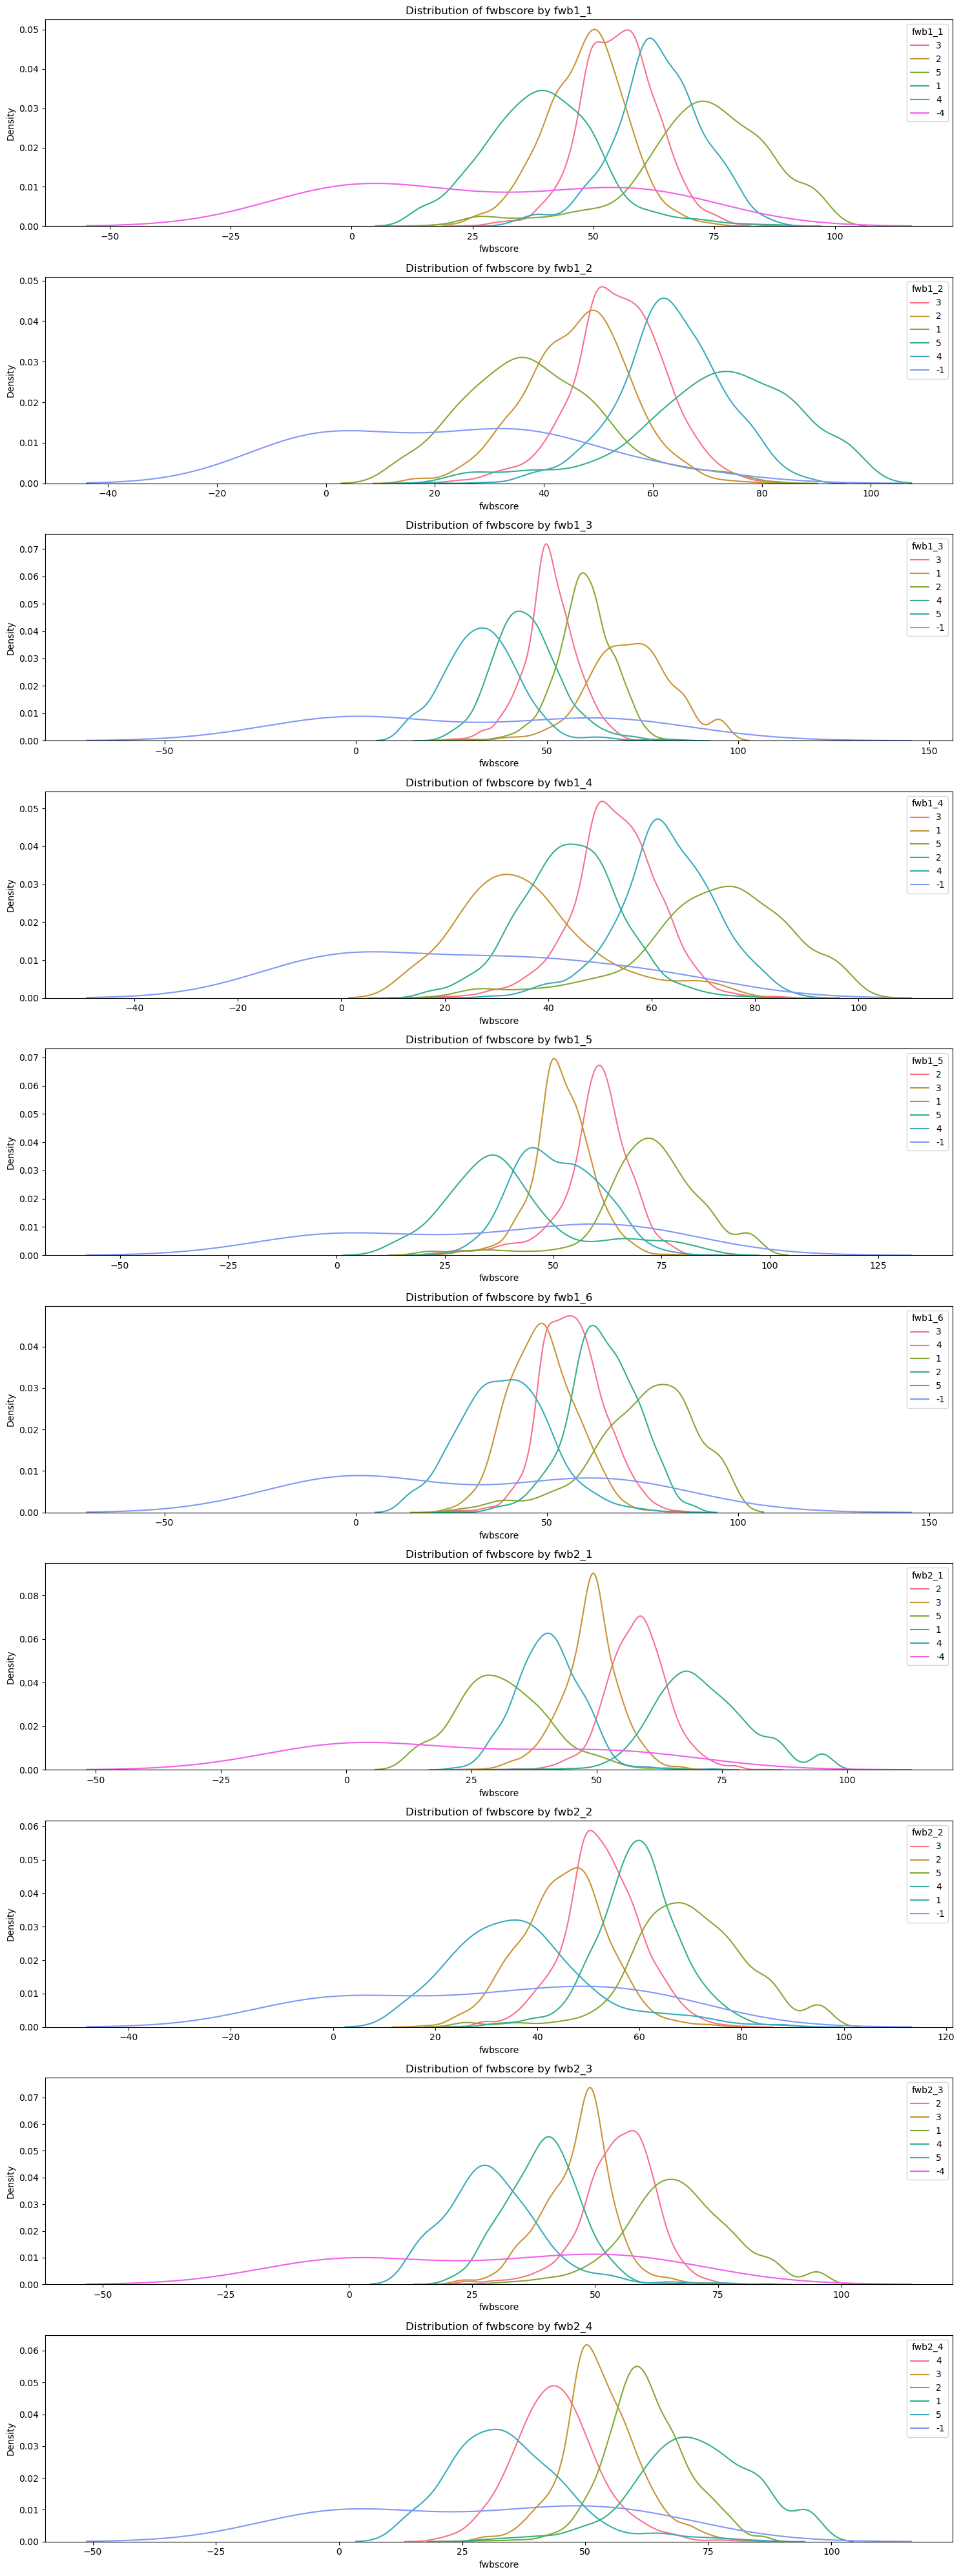

In [32]:
plot_distribution_curves(df, num_attribs, cat_attribs)

## 5.3 Multivariate

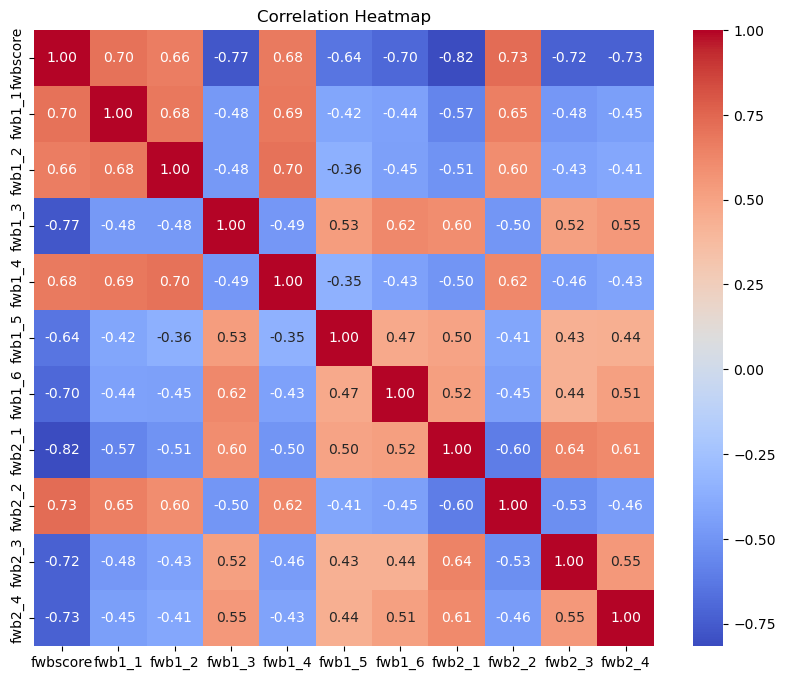

In [33]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_attribs+cat_attribs].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 6. Handle Labels (Optionals)
* Drop null labels
* Drop outlier labels

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6394 entries, 0 to 6393
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   fwbscore  6394 non-null   int64
 1   fwb1_1    6394 non-null   int64
 2   fwb1_2    6394 non-null   int64
 3   fwb1_3    6394 non-null   int64
 4   fwb1_4    6394 non-null   int64
 5   fwb1_5    6394 non-null   int64
 6   fwb1_6    6394 non-null   int64
 7   fwb2_1    6394 non-null   int64
 8   fwb2_2    6394 non-null   int64
 9   fwb2_3    6394 non-null   int64
 10  fwb2_4    6394 non-null   int64
dtypes: int64(11)
memory usage: 549.6 KB


In [35]:
df['fwb1_1'].unique()

array([ 3,  2,  5,  1,  4, -4, -1], dtype=int64)

In [36]:
def drop_negative_values(df):
    """
    Drop all values in the DataFrame that are less than 0.

    Parameters:
        df (pandas.DataFrame): Input DataFrame.

    Returns:
        pandas.DataFrame: DataFrame with negative values dropped.
    """
    df_without_null = df[df >= 0]
    print(len(df)-len(df_without_null.dropna()))
    return df_without_null.dropna()

In [37]:
df = drop_negative_values(df)

19


In [38]:
df.isnull().sum()

fwbscore    0
fwb1_1      0
fwb1_2      0
fwb1_3      0
fwb1_4      0
fwb1_5      0
fwb1_6      0
fwb2_1      0
fwb2_2      0
fwb2_3      0
fwb2_4      0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6375 entries, 0 to 6393
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fwbscore  6375 non-null   float64
 1   fwb1_1    6375 non-null   float64
 2   fwb1_2    6375 non-null   float64
 3   fwb1_3    6375 non-null   float64
 4   fwb1_4    6375 non-null   float64
 5   fwb1_5    6375 non-null   float64
 6   fwb1_6    6375 non-null   float64
 7   fwb2_1    6375 non-null   float64
 8   fwb2_2    6375 non-null   float64
 9   fwb2_3    6375 non-null   float64
 10  fwb2_4    6375 non-null   float64
dtypes: float64(11)
memory usage: 597.7 KB


# 7. Split Train Test For Modelling

In [40]:
target_column = [col for col in df.columns if 'score' in col.lower()]

In [41]:
target_column

['fwbscore']

In [42]:
num_attribs

['fwbscore']

In [43]:
# num_attribs.remove(target_column)

In [44]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

train = train_set.drop(columns=target_column, errors='ignore')
train_labels = train_set[target_column]

test = test_set.drop(columns=target_column, errors='ignore')
test_labels = test_set[target_column]

# 8. Data Cleaning for Modelling

## 8.1 Handle Nulls

### 8.1.1 Types of NULLS

**Missing Completely at Random (MCAR)**
- Missing data is random
- Data was lost in ETL, someone was interrupted when completing a survey
- Remove or impute

**Missing at Random (MAR)**
- Missing data suggests something about something else observed
- Older (which we have in data) may have higher privacy concerns and not report income
- Remove or impute

**Missing Not at Random (MNAR)**
- Missing based on something not observed
- Self-selection bias: Depressed do not complete mental health surveys
- Advanced econometrics

**By Design:**
- Remove credit card data if birthdate is below a certain value

### 8.1.2 Solutions to handle Nulls 
- Get rid of the corresponding rows.
- Get rid of the whole attribute.
- Set the values to some value (zero, the mean, the median, etc.).
- Create a new column that have True for the non-null and False for null (or the opposite)

In [45]:
# df.dropna(subset=["minimum_payments"]) # option 1
# df.drop("minimum_payments", axis=1) # option 2
# median = df["minimum_payments"].median() # option 3
# df["minimum_payments"].fillna(median, inplace=True) # option 4
# 

In [46]:
# from sklearn.impute import SimpleImputer
# train_imputer = SimpleImputer(strategy="median")
# train_labels_imputer = SimpleImputer(strategy="median")

Fit train (non_labels)

In [47]:
# train_imputer.fit(train_num)

In [48]:
# train_num.isnull().sum().sum()

In [49]:
# train_imputer.statistics_


In [50]:
# train_num.median().values

In [51]:
# X = train_imputer.transform(train_num) # return Numpy value

In [52]:
# train_num =  pd.DataFrame(X, columns=train_num.columns)


In [53]:
# train_num.isnull().sum().sum()

Fit Labels

In [54]:
# train_labels_imputer.fit(train_labels)

In [55]:
# train_labels_imputer.statistics_


In [56]:
# train_labels.isnull().sum()

In [57]:
# Y = train_labels_imputer.transform(train_labels) # return Numpy value

In [58]:
# train_labels =  pd.DataFrame(Y, columns=train_labels.columns)


## 8.2 Handle Outliers

In [59]:
# num_rows = 3
# num_cols = len(num_attribs) // num_rows + (len(num_attribs) % num_rows > 0)

# fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))
# axes = axes.ravel()  # Flatten the axes array

# for i, col in enumerate(num_attribs):
#     ax = axes[i]
#     sns.boxplot(x=df[col], ax=ax, color='skyblue')  # Use seaborn's boxplot function
#     ax.set_title(f'Box plot for {col}')
#     ax.set_xlabel('Values')
#     ax.set_ylabel('')

# plt.tight_layout()
# plt.show()

In [60]:
# Remove Outlier
def remove_outliers(df, column_names=None):
    """
    Remove outliers from specific columns in the DataFrame based on the interquartile range (IQR) method,
    or remove outliers from all numerical columns if column_names is None.

    Parameters:
    - df: DataFrame
        The DataFrame containing the data.
    - column_names: list or None, default None
        The list of column names for which outliers are to be removed,
        or None to remove outliers from all numerical columns.

    Returns:
    - df_filtered: DataFrame
        The DataFrame with outliers removed.
    """
    if column_names is None:
        num_attribs = df.select_dtypes(include='number').columns
    else:
        num_attribs = column_names

    total_removed = 0
    total_rows = len(df)

    for col in num_attribs:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers from the specified column
        removed_rows = len(df) - len(df[(df[col] >= lower_bound) & (df[col] <= upper_bound)])
        total_removed += removed_rows

        # Update DataFrame
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

        # Print the number and percentage of removed values if any rows have been removed
        percentage_removed = (removed_rows / total_rows) * 100
        print(f"Removed {removed_rows} rows ({percentage_removed:.2f}%) due to outliers in column '{col}'.")

    return df

In [61]:
# We are not handling any outlier in this case to see how the model perform

# 9.Preprocess Data 

## 9.1 Handle Categorical Data

## 9.2 Feature Scaling
* As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set). Only then can you use them to transform the training set and the test set (and new data).

### 9.2.1 Min-Max Scailing (Normalization Scailing)
* Values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min
* Normalization are more affected by outliers

### 9.2.2 Standardization Scailing 
* First it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance
*  Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1)
* standardization is much less affected by outliers.

In [62]:
# Skip

## 9.3 Transformation Pipelines

In [63]:
# Skip

# 10. Select and Train a Model

## 10.1 Training and Evaluating on the Training Set

Epoch 1/100


C:\Users\minhbpham\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 804.6335 - rmse: 23.0016 - val_loss: 76.9649 - val_rmse: 8.5721
Epoch 2/100
126/128 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 95.0830 - rmse: 9.5407

128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 94.9848 - rmse: 9.5364 - val_loss: 73.6317 - val_rmse: 8.4249
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 78.4381 - rmse: 8.7097 - val_loss: 50.2221 - val_rmse: 6.9400
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 63.3177 - rmse: 7.8392 - val_loss: 31.0819 - val_rmse: 5.4693
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 42.3738 - rmse: 6.4251 - val_loss: 21.1046 - val_rmse: 4.5431
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 34.0737 - rmse: 5.7632 - val_loss: 14.3776 - val_rmse: 3.7537
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 28.6167 - rmse: 5.2888 - val_loss: 8.2107 - val_rmse: 2.8344
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 21.7116 - rmse: 4.6085 - val_loss: 6.9481 - val_rmse: 2.6063
Epoch 9/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 22.9283 - rmse: 4.7436 - val_loss: 18.2429 - val_rmse: 4.2606
Epoch 10/100
128/128 ━━━━━━━━━

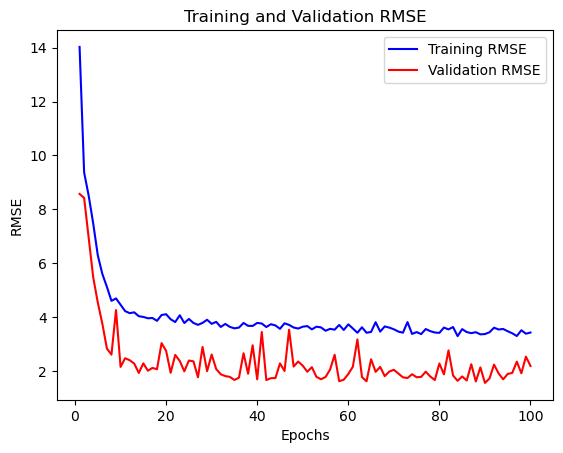

In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define a custom metric function for RMSE
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Define the model with the given parameters
model = Sequential([
    Dense(782, activation='relu', input_shape=(train.shape[1],)),  # Input layer with 782 neurons and ReLU activation
    Dropout(0.3139458037685006),  # Dropout layer with dropout rate
    Dense(500, activation='relu'),  # Hidden layer with 500 neurons and ReLU activation
    Dropout(0.3139458037685006),  # Dropout layer with dropout rate
    Dense(1)  # Output layer with 1 neuron (no activation function for regression)
])
# Step 3: Compile the model
model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Using MSE loss for regression and RMSE as a metric

# Step 4: Train the model
history = model.fit(train, train_labels, epochs=100, batch_size=32, validation_split=0.2)

# Extract RMSE values from history
train_rmse = history.history['rmse']
val_rmse = history.history['val_rmse']
epochs = range(1, len(train_rmse) + 1)

# Plot RMSE for training and validation data
plt.plot(epochs, train_rmse, 'b', label='Training RMSE')
plt.plot(epochs, val_rmse, 'r', label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# 11. Fine Tune Your Model

## 11.1 Grid Search
One way to do that would be to fiddle with the hyperparameters manually, until you find a great combination of hyperparameter values. This would be very tedious work, and you may not have time to explore many combinations.


Instead you should get Scikit-Learn’s GridSearchCV to search for you. All you need to do is tell it which hyperparameters you want it to experiment with, and what values to try out, and it will evaluate all the possible combinations of hyperparameter values, using cross-validation.

This param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of n_estimators and max_features hyperparameter values specified in the first dict. It will then try all 2 × 3 = 6 combinations of hyperparameter values in the second dict, but this time with the bootstrap hyperparameter set to False instead of True (which is the default value for this hyperparameter)

Non of the fine tune model are as good as the orininal one

## 11.2 Randomized Search
Better when the hyperparameter space is large. This approach is the same way as the GridSearchCV class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. This approach has two main benefits:
* If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach).
* You have more control over the computing budget you want to allocate to hyperparameter search, simply by setting the number of iterations


## 11.3 Ensemble Methods
Another way to fine-tune your system is to try to combine the models that perform best. The group (or “ensemble”) will often perform better than the best individual model (just like Random Forests perform better than the individual Decision Trees they rely on), especially if the individual models make very different types of errors.

# 12. Analyze Model and Explain Features important

## 12.1 Lime

In [65]:
import lime
import lime.lime_tabular

# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(train.values, 
                                                   mode='regression',
                                                   training_labels=train_labels,
                                                   feature_names=train.columns)

# Generate explanation for a specific data row
exp = explainer.explain_instance(test.values[5], 
                                  model.predict, 
                                  num_features=len(train.columns))

# Show explanation in notebook
exp.show_in_notebook(show_table=True)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step


In [75]:
# Get feature importance values
feature_importance = exp.as_list()

# Sort feature importance based on absolute values
sorted_importance = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

# Select top 2 most important features
top_features = sorted_importance[:2]

# Extract feature names
top_feature_names = [feature[0] for feature in top_features]

print("Top 2 most important features:")
for feature_name, importance_score in top_features:
    print(f"{feature_name}: {importance_score}")

Top 2 most important features:
fwb2_3 > 3.00: -7.307985384643633
fwb1_3 > 3.00: -4.6648706315008965


In [76]:
test_labels.values[5]

array([43.])

## 12.1 Shapley

# 13 Evaluate Your System on the Test Set
Now is the time to evaluate the final model on the test set. There is nothing special about this process; just get the predictors and the labels from your test set, run your full_pipeline to transform the data (call `transform`, not `fit_transform()`, you do not want to fit the test set!), and evaluate the final model on the test set:


In [68]:
final_model = model

In [71]:
from keras.metrics import mean_squared_error

In [77]:
test = test_set.drop(columns = target_column, axis=1)
test_labels = test_set[target_column].copy()

final_model.fit(test, test_labels)
final_predictions = final_model .predict(test)
final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

 1/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 10.3545 - rmse: 3.2178

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.0969 - rmse: 3.2956
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [81]:
print(final_rmse.mean())

2.1180604


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=32262d87-0112-4aca-8334-f1fef4039a3d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>